In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# correct loading for ALL spam datasets
df = pd.read_csv("spam.csv", encoding="latin-1", sep="\t")

# remove garbage empty columns
df = df.loc[:, ~df.columns.str.contains("^Unnamed")]

# keep only first two columns
df = df.iloc[:, :2]

# rename columns
df.columns = ["label", "message"]

df.head()

,label,message
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...


In [3]:
df["label"] = df["label"].map({"ham":0, "spam":1})

df.head()

,label,message
0,0,Ok lar... Joking wif u oni...
1,1,Free entry in 2 a wkly comp to win FA Cup fina...
2,0,U dun say so early hor... U c already then say...
3,0,"Nah I don't think he goes to usf, he lives aro..."
4,1,FreeMsg Hey there darling it's been 3 week's n...


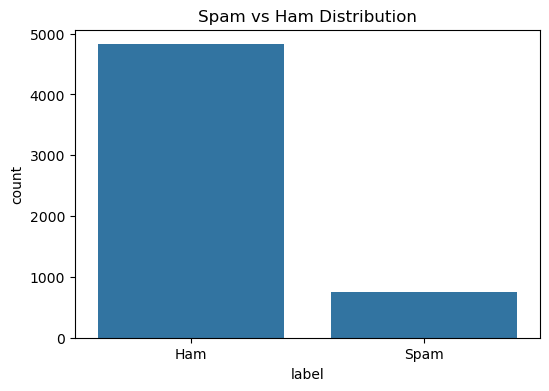

In [4]:
plt.figure(figsize=(6,4))
sns.countplot(x=df["label"])
plt.xticks([0,1], ["Ham","Spam"])
plt.title("Spam vs Ham Distribution")
plt.show()

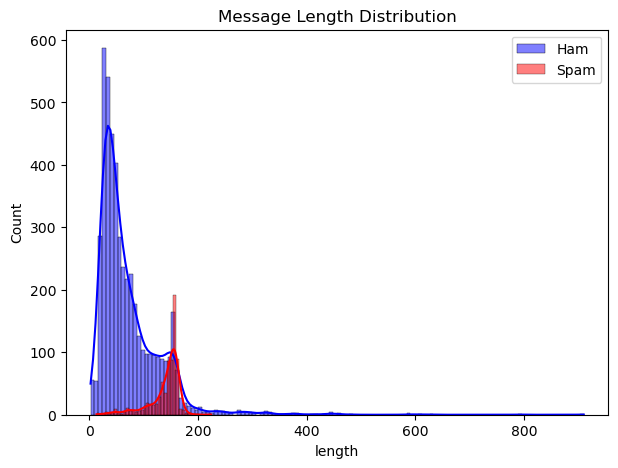

In [5]:
df["length"] = df["message"].apply(len)

plt.figure(figsize=(7,5))
sns.histplot(df[df["label"]==0]["length"], color="blue", label="Ham", kde=True)
sns.histplot(df[df["label"]==1]["length"], color="red", label="Spam", kde=True)

plt.legend()
plt.title("Message Length Distribution")
plt.show()

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

X = cv.fit_transform(df["message"])
y = df["label"]

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix

pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred))

Accuracy: 0.9820627802690582
Confusion Matrix:
 [[944  11]
 [  9 151]]


In [10]:
msg = ["Congratulations! You won a free ticket"]

msg_vec = cv.transform(msg)

print("Prediction:", "Spam" if model.predict(msg_vec)[0]==1 else "Not Spam")

Prediction: Spam
